In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
df = pd.read_csv('epa-sea-level.csv')

In [31]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Text(0.5, 1.0, 'Ano x CSIRO Adjusted Sea Level')

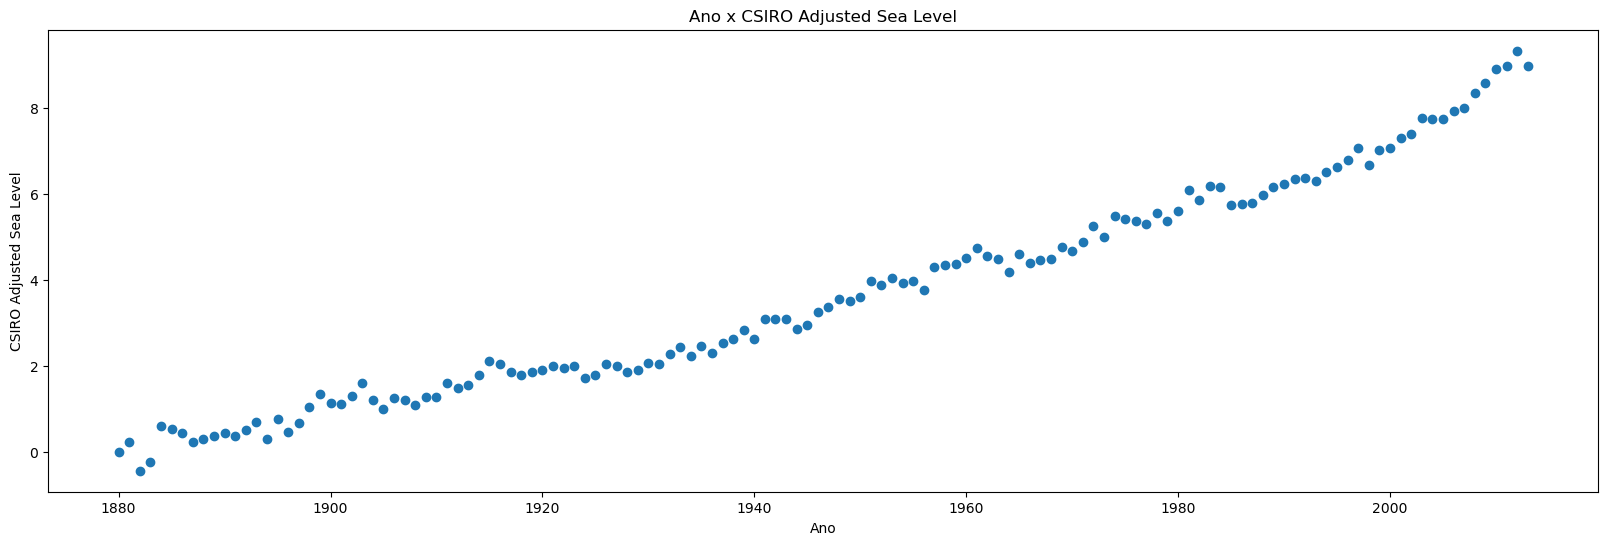

In [32]:
plt.figure(figsize=(20,6))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.xlabel('Ano')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Ano x CSIRO Adjusted Sea Level')

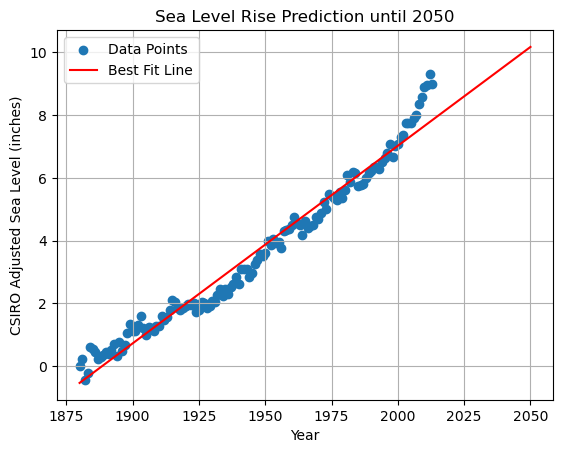

Predicted sea level rise in 2050: 10.18 inches


In [33]:
from scipy.stats import linregress


slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data Points')

years_extended = list(range(df['Year'].min(), 2051))

line_best_fit = [slope * year + intercept for year in years_extended]


plt.plot(years_extended, line_best_fit, color='red', label='Best Fit Line')

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Sea Level Rise Prediction until 2050')
plt.legend()
plt.grid(True)


plt.show()

# Step 6: Predict the sea level in 2050
sea_level_2050 = slope * 2050 + intercept
print(f"Predicted sea level rise in 2050: {sea_level_2050:.2f} inches")


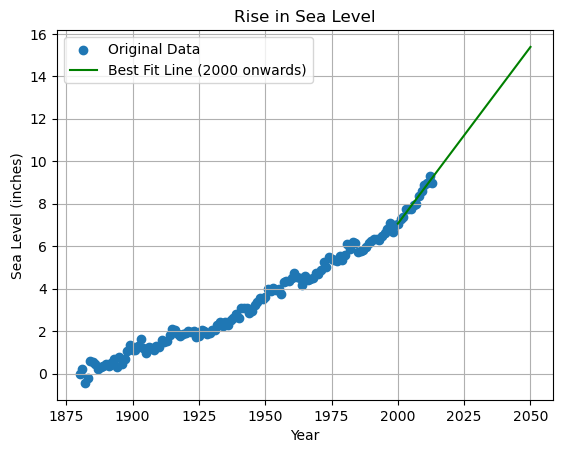

Predicted sea level rise in 2050 (using data from 2000 onwards): 15.38 inches


In [34]:
# Step 2: Filter the data from the year 2000 onwards
df_2000 = df[df['Year'] >= 2000]

# Step 3: Perform linear regression on the filtered data
slope_2000, intercept_2000, r_value_2000, p_value_2000, std_err_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

# Step 4: Plot the scatter plot for all data
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Original Data')

# Create x-values from the year 2000 to 2050 for the new line of best fit
years_2000_to_2050 = list(range(2000, 2051))

# Calculate the new line of best fit
line_best_fit_2000 = [slope_2000 * year + intercept_2000 for year in years_2000_to_2050]

# Plot the new line of best fit
plt.plot(years_2000_to_2050, line_best_fit_2000, color='green', label='Best Fit Line (2000 onwards)')

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Step 6: Predict the sea level in 2050 using the filtered data's regression
sea_level_2050_new = slope_2000 * 2050 + intercept_2000
print(f"Predicted sea level rise in 2050 (using data from 2000 onwards): {sea_level_2050_new:.2f} inches")


# Indo além do exercício

In [35]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [36]:
X = np.array(df.Year)
y = df['CSIRO Adjusted Sea Level']

In [40]:
X = X.reshape(-1,1)

In [41]:
model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
X_train.shape

(107, 1)

In [44]:
model.fit(X_train,y_train)

LinearRegression()

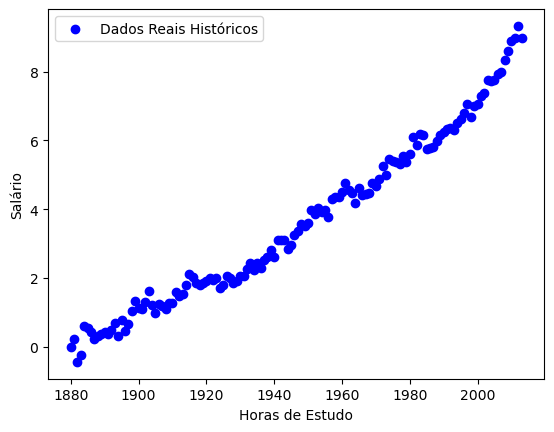

In [45]:
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

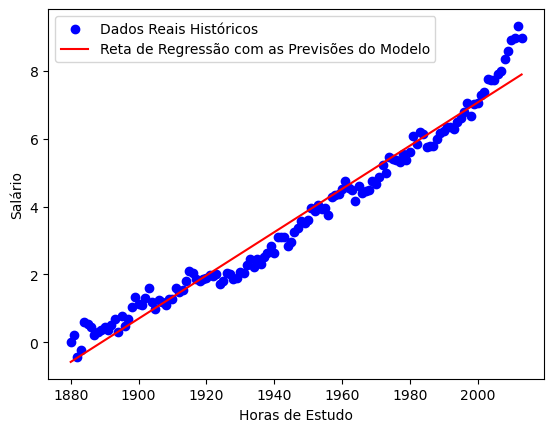

In [46]:
y_previsao = model.predict(X) 
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X,y_previsao,color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [47]:
# Avalia o modelo nos dados de teste
score = model.score(X_test, y_test)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.97


In [53]:
# Define um novo valor para horas de estudo
ano = np.array([[2050]]) 
nivelDoMar = model.predict(ano)
print(f"No ano de {ano[0,0]} o nivel do mar vai estar {nivelDoMar[0]}")

No ano de 2050 o nivel do mar vai estar 10.252687671354238
